# Case Background & Key Questions	

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of his years’ survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1)  How does health status, represented by average number of days with bad physical health in the past month (PHYSHLTH), differ by state? Also provide an indication of distribution using whatever statistics you find suitable.
 												 								
2)  Digging deeper into the data, what are some factors that impact health (i.e. demographics, behaviors, previous illness, etc.)?	
						 						
To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`. Below you will find a list of steps/questions that you will need to take in your investigation. The first part of the notebook will be focused on cleaning up your data and visualizing it.  The second part of the data set will be focused on performing statistical tests to make statements with statistical significance.  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# pd.read_csv('case_study.csv')

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

/Users/carlosruiz/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (171) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

_STATE  FMONTH    IDATE  IMONTH  IDAY  IYEAR  DISPCODE       SEQNO  \
49938     9.0     5.0  5172017       5    17   2017    1200.0  2017000001   
49939     9.0     2.0  2142017       2    14   2017    1200.0  2017000002   
49940     9.0     1.0  1292017       1    29   2017    1200.0  2017000003   
49941     9.0     7.0  9112017       9    11   2017    1200.0  2017000004   
49942     9.0     5.0  7182017       7    18   2017    1200.0  2017000005   

               _PSU  CTELENM1  ...  _PA300R2  _PA30021  _PASTRNG  _PAREC1  \
49938  2.017000e+09       NaN  ...       2.0       2.0       2.0      4.0   
49939  2.017000e+09       NaN  ...       1.0       1.0       1.0      1.0   
49940  2.017000e+09       NaN  ...       3.0       2.0       1.0      3.0   
49941  2.017000e+09       NaN  ...       2.0       2.0       2.0      2.0   
49942  2.017000e+09       NaN  ...       2.0       2.0       1.0      1.0   

       _PASTAE1  _RFSEAT2  _RFSEAT3  _FLSHOT6  _PNEUMO2  _AIDTST3  
49938       2.0       1.0       1.0       NaN       NaN       1.0  
49939       1.0       2.0       2.0       NaN       NaN       2.0  
49940       2.0       1.0       1.0       NaN       NaN       2.0  
49941       2.0       1.0       1.0       NaN       NaN       1.0  
49942       1.0       1.0       1.0       NaN       NaN       2.0  

[5 rows x 358 columns]

In [4]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

In [5]:
df['PHYSHLTH'].value_counts()

88.0    21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [6]:
pd.set_option('display.max_columns', 360)

In [7]:
# your code here
df[df['_STATE'].isin([9,34,36])]

_STATE  FMONTH    IDATE  IMONTH  IDAY  IYEAR  DISPCODE       SEQNO  \
49938      9.0     5.0  5172017       5    17   2017    1200.0  2017000001   
49939      9.0     2.0  2142017       2    14   2017    1200.0  2017000002   
49940      9.0     1.0  1292017       1    29   2017    1200.0  2017000003   
49941      9.0     7.0  9112017       9    11   2017    1200.0  2017000004   
49942      9.0     5.0  7182017       7    18   2017    1200.0  2017000005   
...        ...     ...      ...     ...   ...    ...       ...         ...   
303774    36.0     5.0  5152017       5    15   2017    1200.0  2017012245   
303775    36.0     6.0  6252017       6    25   2017    1200.0  2017012246   
303776    36.0     7.0  7212017       7    21   2017    1200.0  2017012247   
303777    36.0     7.0  7202017       7    20   2017    1200.0  2017012248   
303778    36.0     7.0  7252017       7    25   2017    1200.0  2017012249   

                _PSU  CTELENM1  PVTRESD1  COLGHOUS  STATERE1  CELLFON4  \
49938   2.017000e+09       NaN       NaN       NaN       NaN       NaN   
49939   2.017000e+09       NaN       NaN       NaN       NaN       NaN   
49940   2.017000e+09       NaN       NaN       NaN       NaN       NaN   
49941   2.017000e+09       NaN       NaN       NaN       NaN       NaN   
49942   2.017000e+09       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
303774  2.017012e+09       NaN       NaN       NaN       NaN       NaN   
303775  2.017012e+09       NaN       NaN       NaN       NaN       NaN   
303776  2.017012e+09       NaN       NaN       NaN       NaN       NaN   
303777  2.017012e+09       NaN       NaN       NaN       NaN       NaN   
303778  2.017012e+09       NaN       NaN       NaN       NaN       NaN   

        LADULT  NUMADULT  NUMMEN  NUMWOMEN  SAFETIME  CTELNUM1  CELLFON5  \
49938      NaN       NaN     NaN       NaN       1.0       1.0       1.0   
49939      NaN       NaN     NaN       NaN       1.0       1.0       1.0   
49940      NaN       NaN     NaN       NaN       1.0       1.0       1.0   
49941      NaN       NaN     NaN       NaN       1.0       1.0       1.0   
49942      NaN       NaN     NaN       NaN       1.0       1.0       1.0   
...        ...       ...     ...       ...       ...       ...       ...   
303774     NaN       NaN     NaN       NaN       1.0       1.0       1.0   
303775     NaN       NaN     NaN       NaN       1.0       1.0       1.0   
303776     NaN       NaN     NaN       NaN       1.0       1.0       1.0   
303777     NaN       NaN     NaN       NaN       1.0       1.0       1.0   
303778     NaN       NaN     NaN       NaN       1.0       1.0       1.0   

        CADULT  PVTRESD3  CCLGHOUS  CSTATE1  LANDLINE  HHADULT  GENHLTH  \
49938      2.0       1.0       NaN      2.0       2.0      2.0      3.0   
49939      1.0       1.0       NaN      2.0       2.0      2.0      4.0   
49940      2.0       1.0       NaN      2.0       2.0      3.0      2.0   
49941      1.0       1.0       NaN      2.0       2.0      1.0      1.0   
49942      2.0       1.0       NaN      2.0       2.0      1.0      1.0   
...        ...       ...       ...      ...       ...      ...      ...   
303774     1.0       1.0       NaN      2.0       2.0      2.0      3.0   
303775     2.0       1.0       NaN      2.0       2.0      1.0      2.0   
303776     1.0       1.0       NaN      2.0       2.0      5.0      2.0   
303777     2.0       1.0       NaN      2.0       2.0      2.0      4.0   
303778     1.0       1.0       NaN      2.0       2.0      1.0      3.0   

        PHYSHLTH  MENTHLTH  POORHLTH  HLTHPLN1  PERSDOC2  MEDCOST  CHECKUP1  \
49938       88.0       2.0      88.0       1.0       1.0      2.0       2.0   
49939       88.0      88.0       NaN       1.0       1.0      2.0       2.0   
49940        2.0      88.0      88.0       1.0       3.0      2.0       9.0   
49941       88.0      88.0       NaN       1.0      

Now check to see how large our subset df.

In [8]:
df.shape

(34545, 358)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code.

In [9]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [10]:
df['PHYSHLTH'].value_counts()

88.0    21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

In [11]:
#your code here
df['PHYSHLTH'].replace(to_replace=[88,77,99],value=[0,np.nan,np.nan], inplace= True)
df.dropna(subset=['PHYSHLTH'], inplace=True)
df['PHYSHLTH'].value_counts()

0.0     21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
20.0      402
14.0      326
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a graph shows the distribution of the data.

In [12]:
# descriptive statistics
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

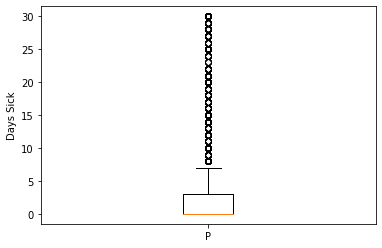

In [13]:
plt.boxplot(df['PHYSHLTH'], labels='P')
plt.ylabel('Days Sick')
plt.show()

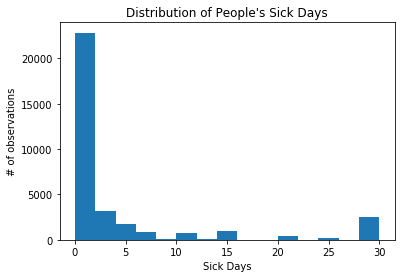

In [14]:
# graphic the distribution of data
plt.hist(df['PHYSHLTH'],bins=15)
plt.xlabel('Sick Days')
plt.ylabel('# of observations')
plt.title('Distribution of People\'s Sick Days')
plt.show()

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [15]:
# code to calculate the average number of sick days by state
health=df[['_STATE','PHYSHLTH']].groupby('_STATE').mean()
health.reset_index(level='_STATE',inplace=True, col_level=1)

In [16]:
health

_STATE  PHYSHLTH
0     9.0  3.688562
1    34.0  4.380957
2    36.0  4.148030

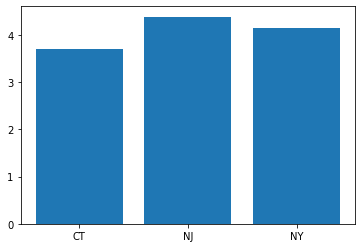

In [17]:
# code to graph those averages using matplotlib
plt.bar(health['_STATE'].index,health['PHYSHLTH'])
plt.xticks(list(health['_STATE'].index), labels=['CT','NJ','NY'])
plt.show()

In [18]:
ct=df[df[['PHYSHLTH','_STATE']]._STATE==9]
nj=df[df[['PHYSHLTH','_STATE']]._STATE==34]
ny=df[df[['PHYSHLTH','_STATE']]._STATE==36]

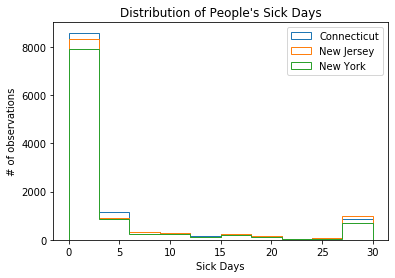

In [19]:
# graphic showing the histogram of data
plt.hist(ny['PHYSHLTH'],stacked='True',histtype='step')
plt.hist(nj['PHYSHLTH'],stacked='True',histtype='step')
plt.hist(ct['PHYSHLTH'],stacked='True',histtype='step')
plt.legend(('Connecticut', 'New Jersey', 'New York'))
plt.xlabel('Sick Days')
plt.ylabel('# of observations')
plt.title('Distribution of People\'s Sick Days')
plt.show()

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [20]:
# code to create new colum for chronically sick
df['chron'] = np.where(df['PHYSHLTH']>12, 1, 0)

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [21]:
# code to calculate averages per state
cron=df[['_STATE','chron']].groupby('_STATE').mean()
cron.reset_index(level='_STATE',inplace=True, col_level=1)
cron

_STATE     chron
0     9.0  0.112744
1    34.0  0.136935
2    36.0  0.126810

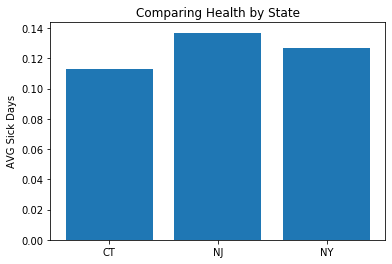

In [22]:
# create graphic to compare chronically sick by state
plt.bar(cron['_STATE'].index,cron['chron'])
plt.xticks(list(cron['_STATE'].index), labels=['CT','NJ','NY'])
plt.ylabel('AVG Sick Days')
plt.title('Comparing Health by State')
plt.show()

## 6. Independent Variables (categorical)

Does smoking affect the number of days people feel physically ill? 
Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`. When cleaning this data you will find that many respondents were not asked that question. read the codebook to understand why, and use that information when cleaning up your data. I.E, you will need to process two columns in order to create a new column of smokers.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [23]:
# your code here
smoking=df[['SMOKDAY2','SMOKE100','_STATE','PHYSHLTH']]
smoking['NEWSMOKE']=0
smoking.reset_index(inplace=True)

/Users/carlosruiz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
conditions=[
    smoking.SMOKE100==2,#None Smoker(0)
    smoking.SMOKE100==7,#Dont know(1)
    smoking.SMOKE100==9,#Refused(2)
    ((smoking.SMOKE100==1)&(smoking.SMOKDAY2==1)),#Smoker everyday(3)
    ((smoking.SMOKE100==1)&(smoking.SMOKDAY2==2)),#smoker somedays(4)
    ((smoking.SMOKE100==1)&(smoking.SMOKDAY2==3)),#none smoker(0)
    ((smoking.SMOKE100==1)&(smoking.SMOKDAY2==7)),#dont know(1)
    ((smoking.SMOKE100==1)&(smoking.SMOKDAY2==9)),#refused(2)
]
choises=[
    'n',
    "d",
    "r",
    "e",
    "s",
    "n",
    'd',
    "r",
]
smoking.NEWSMOKE=np.select(conditions,choises,default=None)


/Users/carlosruiz/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [25]:
todrop=list(smoking[smoking.NEWSMOKE.isna()].index)
smoking.drop(todrop,inplace=True)
y=list(smoking.NEWSMOKE.value_counts().values)
x=list(smoking.NEWSMOKE.value_counts().index)

/Users/carlosruiz/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


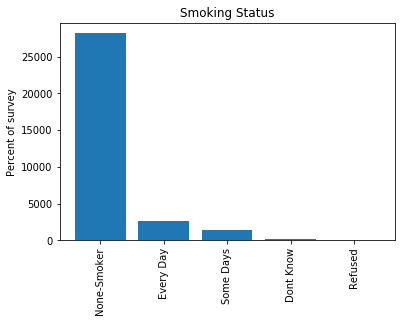

In [26]:
# code to graph those proportion of differen smoking groups using matplotlib
plt.bar(x,y)
plt.xticks(x,labels=['None-Smoker','Every Day','Some Days','Dont Know','Refused'],rotation=90)
plt.title('Smoking Status')
plt.ylabel('Percent of survey')
plt.show()

In [27]:
# your code here
ct=list(smoking[smoking['_STATE']==9].NEWSMOKE.value_counts())
nj=list(smoking[smoking['_STATE']==34].NEWSMOKE.value_counts())
ny=list(smoking[smoking['_STATE']==36].NEWSMOKE.value_counts())
x=[9,34,35]

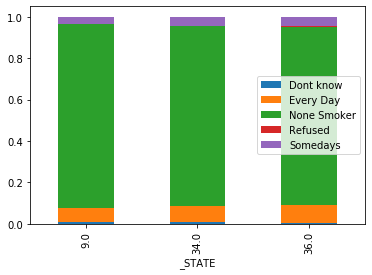

In [28]:
#graph showing the breakdown of smokers per state
pd.crosstab(smoking['_STATE'], smoking['NEWSMOKE'], normalize='index')
pd.crosstab(smoking['_STATE'], smoking['NEWSMOKE'], normalize='index').plot.bar(stacked=True);
plt.legend(labels=['Dont know','Every Day','None Smoker','Refused','Somedays'])
plt.show()


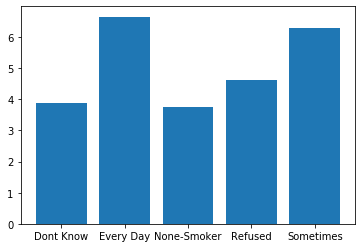

In [29]:
# code to graph these averages sick days for each category of smoking status
x=smoking[['NEWSMOKE','PHYSHLTH']].groupby('NEWSMOKE').mean()
x.reset_index(inplace=True)
plt.bar(x.NEWSMOKE,x.PHYSHLTH)
plt.xticks(x.NEWSMOKE,labels=['Dont Know','Every Day','None-Smoker','Refused','Sometimes'])
plt.show()

## 7. Independent Variables (continuous):

Does the amount of days a person drinks affect the number of days they feel physically ill?
To investigate this, let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [30]:
# code here to clean up the ALCDAY5 responses


In [31]:
#descriptive statistics of cleaned data

In [32]:
# graphic showing the histogram of data


In [33]:
# code to calculate averages per state


In [34]:
# Code to calculate correlation of between number of dirnks of number of days physically ill

## 8. Statistical Inference


- Create a 95% confidence interval for the population mean of physically ill days.

In [35]:
df.PHYSHLTH.describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

The 95 percent confidence intervals are : +4.98 -3.18

-  Create a 95% confidence interval for the true proportion of chronically sick people.

In [36]:
df.PHYSHLTH[df.PHYSHLTH >= 25].describe()

count    2718.000000
mean       29.618102
std         1.236125
min        25.000000
25%        30.000000
50%        30.000000
75%        30.000000
max        30.000000
Name: PHYSHLTH, dtype: float64

The 95 percent confidence interval for chronically sick people are +29.67 -29.58

## 9. Hypothesis Tests 

**For the follwing questions that require hypothesis tests, you must complete the following:**

*1. Write down the null and alternative hypothesis you are testing.* 

*2. Select the appropriate test and calculate the test statistic and P-values.*

*3. Determine the critical value for the 95% confidence interval.*

*4. Evaluate the test statistic agains the critical value.*

*5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.*  

### The following questions are regarding the `PHYSHLTH` variable. 
- What is the probability of getting this sample mean for days physically ill, if the population mean is 4?
- Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states. 


In [37]:
df['PHYSNORM']=df.PHYSHLTH/30

In [38]:
p= df['PHYSNORM'].mean()
n=df['PHYSNORM'].count()
z=1.96
std=df['PHYSNORM'].std()

In [39]:
int_max=p+z*(np.sqrt(p*(1-p)/n))
int_min=p-z*(np.sqrt(p*(1-p)/n))
pop_mean=4/30
print(int_max,int_min,4/30)

0.13983738218233796 0.13251867909717832 0.13333333333333333


In [40]:
z_prob=(p-pop_mean)/(std/np.sqrt(n))
z_prob
#0.96%

1.8415238127138036

The probability of getting a sample mean of 4.08 given that the mean of the population is 4 is 1 - 0.96

In [47]:
to_drop=df[df.SEX==9].index#2FEMALE 1MALE 9REFUSED
df.drop(to_drop, inplace=True)

In [48]:
df.groupby('SEX').PHYSHLTH.count()
p1,p2=df.groupby('SEX').PHYSNORM.mean()
n1,n2=df.groupby('SEX').count().PHYSNORM
p_hat=df.PHYSNORM.mean()

SEX
1.0    14818
2.0    18911
Name: PHYSHLTH, dtype: int64

In [60]:
dif_two=abs((p1-p2)/np.sqrt((p_hat*(1-p_hat))*((1/n1)+(1/n2))))
dif_two

6.0624099191348355

In [68]:
a=0.05

In [62]:
crit_val=1.96

The difference of two proportion is much larger than the required Z score for 95% accuracy.

In [64]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
# why can we use ols in this case?
anova_season = ols('PHYSNORM~_STATE', data=df).fit()
anova_season.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PHYSNORM   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     31.45
Date:                Sat, 29 Aug 2020   Prob (F-statistic):           2.06e-08
Time:                        12:29:28   Log-Likelihood:                -5354.5
No. Observations:               33729   AIC:                         1.071e+04
Df Residuals:                   33727   BIC:                         1.073e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1167      0.004     30.798      0.000       0.109       0.124
_STATE         0.0007      0.000      5.608      0.000       0.000       0.001
==============================================================================
Omnibus:                    14561.145   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50928.568
Skew:                           2.287   Prob(JB):                         0.00
Kurtosis:                       6.914   Cond. No.                         72.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The probability of there not bien a statistical difference in the population is 2.06e-08 making it unlikely since its lower that our alpha of 0.05

### The following questions are regarding the  `CHRONIC` variable.
- What is the probability of drawing this sample proportion if chronically true population proportion is 0.10?
- Is there a statistically significant difference in the percentage of men and women who are chronically sick?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states.

In [74]:
df.chron.count()

33729

In [79]:
p1=df.chron.mean()

In [83]:
p1

0.1258857363100003

In [77]:
n1=df.chron.count()
true_mean=0.10
pop_prop= (true_mean-p1)/np.sqrt(p1*(1-p1)/n1)

In [82]:
pop_prop

-14.33144197917551

In [86]:
import scipy.stats as sp

In [88]:
sp.norm.sf(pop_prop)

1.0

The probabilty of drawing the sample is very close to 0.

In [91]:
df.groupby('SEX').chron.count()
p1,p2=df.groupby('SEX').chron.mean()
print(p1,p2)

0.11317316776892968 0.13584686161493312


In [92]:
n1,n2=df.groupby('SEX').count().chron
print(n1,n2)

14818 18911


In [93]:
p_hat=df.chron.mean()
print(p_hat)

0.1258857363100003


In [97]:
dif_two=abs((p1-p2)/np.sqrt((p_hat*(1-p_hat))*((1/n1)+(1/n2))))
dif_two

6.230174663674317

In [96]:
a=0.05
crit_val=1.96

There is a statistical difference between Men and Women who are chronically ill due to the Zscore being larger than our critical value. 

In [98]:
anova_season = ols('chron~_STATE', data=df).fit()
anova_season.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  chron   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     22.40
Date:                Sat, 29 Aug 2020   Prob (F-statistic):           2.22e-06
Time:                        13:06:26   Log-Likelihood:                -10629.
No. Observations:               33729   AIC:                         2.126e+04
Df Residuals:                   33727   BIC:                         2.128e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1067      0.004     24.080      0.000       0.098       0.115
_STATE         0.0007      0.000      4.733      0.000       0.000       0.001
==============================================================================
Omnibus:                    13791.570   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41904.326
Skew:                           2.253   Prob(JB):                         0.00
Kurtosis:                       6.083   Cond. No.                         72.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The probability of getting our F statistic is 2.22e-06. Making it very unlikely that there is no significant difference between states in determining physical health.

# 10. Independent Investigation

Now that you have invesitgated physical health and chronic sickness and their relationships with states and gender, you will conduct a similar investigation with variables of your choosing. 

Select a continuous dependent varaible and a binary dependent variable that you would like to investigate. Then select a categorical independent variable with at least 3 groups and for which you will test to see if the response to the independent variable affects outcomes of the dependent variable.

For your continuous dependent variable perform the following:
  - Determine the sample mean and sample standard deviation
  - Create a confidence interval for a population mean.
  - Perform a two-sample test of means for gender.
  - Perform a one-way ANOVA using your categorical independent variable.

Select/create a binary variable from the survey questions as you dependent variable and perform the following:
  - Create a confidence interval for a population proportion.
  - Perform a two proportions z-test using gender.
  - Perform a Chi-Square test using your categorical independent variable.

In [171]:
new_df=df[['STRENGTH','SEX','EMPLOY1']].copy()

In [172]:
new_df.STRENGTH.replace([777,999,888],[np.nan,np.nan,0] ,inplace=True)

In [173]:
new_df.dropna(inplace=True)
new_df.SEX=new_df.SEX-1

In [174]:
new_df.STRENGTH.unique()

array([204., 214., 102., 203., 104., 106., 105.,   0., 210., 107., 101.,
       220., 208., 103., 215., 202., 201., 160., 205., 230., 206., 225.,
       212., 222., 114., 130., 213., 117., 218., 112., 110., 224., 207.,
       209., 180., 217., 216., 299., 231., 121., 150., 229., 228., 226.,
       290., 223., 227., 235., 260., 250., 108., 120., 199., 232., 211.,
       275., 118., 115., 221., 240., 128., 140., 109., 135.])

In [175]:
conditions=[
    (new_df.STRENGTH>100) & (new_df.STRENGTH<200),  
    (new_df.STRENGTH>200),
]
choices=[
    (new_df.STRENGTH-100)/7,
    (new_df.STRENGTH-200)/30,
    
]
new_df.STRENGTH=np.select(conditions,choices,default=0)

In [176]:
new_df.STRENGTH

49938     0.133333
49939     0.466667
49940     0.285714
49941     0.100000
49942     0.571429
            ...   
303773    0.000000
303774    0.000000
303775    0.000000
303776    0.000000
303778    0.000000
Name: STRENGTH, Length: 30195, dtype: float64

In [177]:
new_df

STRENGTH  SEX  EMPLOY1
49938   0.133333  1.0      1.0
49939   0.466667  0.0      2.0
49940   0.285714  1.0      6.0
49941   0.100000  1.0      1.0
49942   0.571429  1.0      1.0
...          ...  ...      ...
303773  0.000000  1.0      1.0
303774  0.000000  0.0      1.0
303775  0.000000  1.0      1.0
303776  0.000000  0.0      1.0
303778  0.000000  0.0      1.0

[30195 rows x 3 columns]

#### Determine the sample mean and sample standard deviation

In [178]:
new_df.describe()

STRENGTH           SEX       EMPLOY1
count  30195.000000  30195.000000  30195.000000
mean       0.188639      0.562941      3.752376
std        0.362312      0.496031      2.843198
min        0.000000      0.000000      1.000000
25%        0.000000      0.000000      1.000000
50%        0.000000      1.000000      2.000000
75%        0.285714      1.000000      7.000000
max       14.142857      1.000000      9.000000

#### Create a confidence interval for a population mean.

In [179]:
x=new_df.STRENGTH.mean()
a=0.05
o=new_df.STRENGTH.std()
z=1.96
n=new_df.STRENGTH.count()

In [180]:
plus=x+z*(o/np.sqrt(n))
minus=x-z*(o/np.sqrt(n))

In [181]:
print(minus,plus)

0.18455207971957807 0.19272545755796985


#### Perform a two-sample test of means for gender.

In [182]:
n1,n2=new_df.groupby('SEX').STRENGTH.count()

In [183]:
x1,x2=new_df.groupby('SEX').STRENGTH.mean()

In [184]:
o1,o2=new_df.groupby('SEX').STRENGTH.std()

In [185]:
dif=(x1-x2)/np.sqrt((o1**2/n1)+(o2**2/n2))

In [186]:
dif

13.545590211841809

In [187]:
a=0.05
z=1.96

#### Perform a one-way ANOVA using your categorical independent variable.

In [188]:
anova_season = ols('STRENGTH~EMPLOY1', data=new_df).fit()
anova_season.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               STRENGTH   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     27.87
Date:                Sat, 29 Aug 2020   Prob (F-statistic):           1.30e-07
Time:                        14:35:21   Log-Likelihood:                -12175.
No. Observations:               30195   AIC:                         2.435e+04
Df Residuals:                   30193   BIC:                         2.437e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2032      0.003     58.870      0.000       0.196       0.210
EMPLOY1       -0.0039      0.001     -5.279      0.000      -0.005      -0.002
==============================================================================
Omnibus:                    50713.544   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        131961182.457
Skew:                          11.007   Prob(JB):                         0.00
Kurtosis:                     326.114   Cond. No.                         8.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Create a confidence interval for a population proportion.

In [197]:
employ=new_df[new_df.EMPLOY1==1].SEX

In [198]:
semploy=new_df[new_df.EMPLOY1==2].SEX

In [200]:
p1=employ.mean()
p2=semploy.mean()

In [205]:
n1=employ.count()
n2=semploy.count()

p_hat=new_df.SEX.mean()

In [207]:
diff=(p1-p2)/np.sqrt(p_hat*(1-p_hat)*((1/n1)+(1/n2)))

In [208]:
diff

11.638461939000779

In [209]:
d=np.sqrt(p1*(1-p1)/n1)

In [210]:
z=1.96

In [211]:
p_hat_max=p1+z*d

In [212]:
p_hat_min=p1-z*d

In [214]:
print(p_hat_min,p1,p_hat_max)

0.5290497490453279 0.5376360688643558 0.5462223886833837


#### Perform a two proportions z-test using gender.

In [215]:
diff

11.638461939000779

#### Perform a Chi-Square test using your categorical independent variable.

In [242]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
table=[]
new_df.groupby(['SEX','EMPLOY1']).count()

STRENGTH
SEX EMPLOY1          
0.0 1.0          5989
    2.0          1537
    3.0           407
    4.0           373
    5.0            53
    6.0           449
    7.0          3564
    8.0           706
    9.0           119
1.0 1.0          6964
    2.0          1086
    3.0           526
    4.0           354
    5.0          1318
    6.0           441
    7.0          5071
    8.0          1104
    9.0           134

In [250]:
a= new_df.groupby(['SEX','EMPLOY1']).count().values.tolist()

In [257]:
one=a[:9]
one=[ x[0] for x in one]
one
two=a[9:]
two=[x[0] for x in two]
two

[5989, 1537, 407, 373, 53, 449, 3564, 706, 119]

In [261]:
table=[one,two]
table

[[5989, 1537, 407, 373, 53, 449, 3564, 706, 119],
 [6964, 1086, 526, 354, 1318, 441, 5071, 1104, 134]]

In [262]:
stat, p, dof, expected=chi2_contingency(table)
print('dof=%d'%dof)
print(expected)

dof=8
[[5661.22672628 1146.40606061  407.77615499  317.74197715  599.20804769
   388.98261302 3774.00546448  791.0769995   110.57595628]
 [7291.77327372 1476.59393939  525.22384501  409.25802285  771.79195231
   501.01738698 4860.99453552 1018.9230005   142.42404372]]


In [269]:
prob=0.95
alpha=1-prob
critical=chi2.ppf(prob,dof)

In [270]:
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob,critical,stat))
if abs(stat)>=critical:
    print("Dependent (reject H0)")
else:
    print('Independent (fail to reject H0)')

probability=0.950, critical=15.507, stat=1226.243
Dependent (reject H0)


In [271]:
print('significance=%.3f, p=%.3f' % (alpha,p))
if p<= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

significance=0.050, p=0.000
Dependent (reject H0)
